In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install kaggle


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'


# 데이터셋 준비

In [ ]:
# # !kaggle datasets download -d
# toluwaniaremu/smartcity-cctv-violence-detection-dataset-scvd -p
# /content/drive/MyDrive/datasets


In [ ]:
# # !unzip
# /content/drive/MyDrive/datasets/smartcity-cctv-violence-detection-dataset-scvd.zip
# -d /content/drive/MyDrive/datasets/scvd


In [ ]:
train_dir = "/content/drive/MyDrive/datasets/scvd/SCVD/SCVD_converted/Train"
test_dir = "/content/drive/MyDrive/datasets/scvd/SCVD/SCVD_converted/Test"

import os
print("Train 폴더:", os.listdir(train_dir))
print("Test 폴더:", os.listdir(test_dir))


Train 폴더: ['Normal', 'Violence', 'Weaponized']
Test 폴더: ['Normal', 'Violence', 'Weaponized']


In [ ]:
import os

folder_path = '/content/drive/MyDrive/datasets'
print(os.listdir(folder_path))


['smartcity-cctv-violence-detection-dataset-scvd.zip', 'scvd', 'skeleton_dataset', 'UCF_Crime_Dataset.zip', 'ucf_crime', 'skeleton_dataset_hybrid']


In [ ]:
!unzip -o "/content/drive/MyDrive/datasets/UCF_Crime_Dataset.zip" "Test/Abuse/*" -d "/content/drive/MyDrive/datasets/ucf_crime"
!unzip -o "/content/drive/MyDrive/datasets/UCF_Crime_Dataset.zip" "Test/Assault/*" -d "/content/drive/MyDrive/datasets/ucf_crime"
!unzip -o "/content/drive/MyDrive/datasets/UCF_Crime_Dataset.zip" "Test/Fighting/*" -d "/content/drive/MyDrive/datasets/ucf_crime"


In [ ]:
!unzip -o "/content/drive/MyDrive/datasets/UCF_Crime_Dataset.zip" "Train/Abuse/*" -d "/content/drive/MyDrive/datasets/ucf_crime"
!unzip -o "/content/drive/MyDrive/datasets/UCF_Crime_Dataset.zip" "Train/Assault/*" -d "/content/drive/MyDrive/datasets/ucf_crime"
!unzip -o "/content/drive/MyDrive/datasets/UCF_Crime_Dataset.zip" "Train/Fighting/*" -d "/content/drive/MyDrive/datasets/ucf_crime"


In [ ]:
train_dir = "/content/drive/MyDrive/datasets/ucf_crime/Train"
test_dir = "/content/drive/MyDrive/datasets/ucf_crime/Test"

import os
print("Train 폴더:", os.listdir(train_dir))
print("Test 폴더:", os.listdir(test_dir))

Train 폴더: ['Abuse', 'Assault', 'Fighting']
Test 폴더: ['Abuse', 'Assault', 'Fighting']


# 스켈레톤 추출

In [ ]:
!pip install mediapipe


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 109.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 10.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled p

In [ ]:
!pip install mediapipe opencv-python tqdm


INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 11.1 MB/s eta 0:00:00
ERROR: Operation cancelled by user
^C


In [ ]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 74.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.


In [ ]:
import mediapipe as mp
import numpy as np

# Mediapipe와 NumPy 버전 출력
print(f"Mediapipe 버전: {mp.__version__}")
print(f"NumPy 버전: {np.__version__}")


/usr/local/lib/python3.12/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.7.2 is installed, but it is not compatible with the installed jaxlib version 0.7.1, so it will not be used.
  warnings.warn(


Mediapipe 버전: 0.10.21
NumPy 버전: 2.2.6


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import mediapipe as mp
from ultralytics import YOLO

# ==========================================
#설정
# ==========================================
input_dirs = {
    "Normal": "/content/drive/MyDrive/datasets/scvd/SCVD/SCVD_converted/Train/Normal",
    "Violence": "/content/drive/MyDrive/datasets/scvd/SCVD/SCVD_converted/Train/Violence",
}

output_root = "/content/drive/MyDrive/datasets/skeleton_dataset_hybrid/Train"
os.makedirs(output_root, exist_ok=True)

# ==========================================
# 모델 초기화
# ==========================================
yolo = YOLO("yolov8n.pt")  # 작은 모델 (빠름)
mp_pose = mp.solutions.pose
pose_detector = mp_pose.Pose(
    static_image_mode=False,
    model_complexity=2,                 # 정확도 높임
    enable_segmentation=False,
    min_detection_confidence=0.2,
    min_tracking_confidence=0.2
)

# ==========================================
# 전처리 함수 (어두운 프레임용)
# ==========================================
def enhance_brightness(frame):
    # YCrCb 변환으로 밝기 조절
    ycrcb = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(ycrcb)
    y = cv2.equalizeHist(y)  # 밝기 균일화
    merged = cv2.merge([y, cr, cb])
    frame_enhanced = cv2.cvtColor(merged, cv2.COLOR_YCrCb2BGR)

    # 대비·밝기 미세 조정
    frame_enhanced = cv2.convertScaleAbs(frame_enhanced, alpha=1.4, beta=20)
    return frame_enhanced

# ==========================================
# 스켈레톤 추출 함수
# ==========================================
def extract_skeleton_from_video(video_path, num_frames=32):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if total_frames == 0:
        print(f"영상 손상 또는 프레임 없음: {video_path}")
        return np.zeros((num_frames, 33, 4), dtype=np.float32)

    frame_indices = np.linspace(0, total_frames - 1, num_frames, dtype=np.int32)
    sequence = []

    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if not ret or frame is None:
            sequence.append(np.zeros((33, 4)))
            continue

        # 어두운 장면 보정
        frame = enhance_brightness(frame)

        # YOLO 탐지
        results = yolo(frame, verbose=False)
        if len(results[0].boxes) == 0:
            sequence.append(np.zeros((33, 4)))  # 사람 없음
            continue

        # 가장 큰 사람 선택
        boxes = results[0].boxes.xyxy.cpu().numpy()
        areas = [(x2 - x1) * (y2 - y1) for x1, y1, x2, y2 in boxes]
        main_box = boxes[np.argmax(areas)]
        x1, y1, x2, y2 = map(int, main_box)

        # crop & 보정
        person_crop = frame[max(0, y1):y2, max(0, x1):x2]
        if person_crop.size == 0:
            sequence.append(np.zeros((33, 4)))
            continue

        # MediaPipe Pose 처리
        rgb = cv2.cvtColor(person_crop, cv2.COLOR_BGR2RGB)
        result = pose_detector.process(rgb)

        if result.pose_landmarks:
            landmarks = result.pose_landmarks.landmark
            coords = np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in landmarks], dtype=np.float32)
            # 정규화된 좌표를 [-1, 1]로 스케일링
            coords[:, 0] = (coords[:, 0] - 0.5) * 2
            coords[:, 1] = (coords[:, 1] - 0.5) * 2
        else:
            coords = np.zeros((33, 4), dtype=np.float32)

        sequence.append(coords)

    cap.release()
    return np.array(sequence, dtype=np.float32)

# ==========================================
# 전체 처리 루프
# ==========================================
for label, input_dir in input_dirs.items():
    output_dir = os.path.join(output_root, label)
    os.makedirs(output_dir, exist_ok=True)

    video_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.mp4', '.avi', '.mov'))]
    print(f"\n=== [{label}] {len(video_files)}개 영상 처리 시작 ===")

    for video_file in tqdm(video_files, desc=f"{label} 스켈레톤 추출"):
        video_path = os.path.join(input_dir, video_file)
        save_name = os.path.splitext(video_file)[0] + ".npy"
        save_path = os.path.join(output_dir, save_name)

        if os.path.exists(save_path):
            continue

        skeleton = extract_skeleton_from_video(video_path, num_frames=32)
        np.save(save_path, skeleton)

    print(f"{label} 완료 → {output_dir}")

pose_detector.close()
print("\nYOLO+MediaPipe 하이브리드 스켈레톤 추출 완료!")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

=== [Normal] 200개 영상 처리 시작 ===


Normal 스켈레톤 추출: 100%|██████████| 200/200 [00:01<00:00, 198.60it/s]


Normal 완료 → /content/drive/MyDrive/datasets/skeleton_dataset_hybrid/Train/Normal

=== [Violence] 99개 영상 처리 시작 ===


Violence 스켈레톤 추출: 100%|██████████| 99/99 [00:00<00:00, 4028.56it/s]

Violence 완료 → /content/drive/MyDrive/datasets/skeleton_dataset_hybrid/Train/Violence

YOLO+MediaPipe 하이브리드 스켈레톤 추출 완료!


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import mediapipe as mp
from ultralytics import YOLO

# ==========================================
# 설정
# ==========================================
input_dirs = {
    "Normal": "/content/drive/MyDrive/datasets/scvd/SCVD/SCVD_converted/Test/Normal",
    "Violence": "/content/drive/MyDrive/datasets/scvd/SCVD/SCVD_converted/Test/Violence",
}

output_root = "/content/drive/MyDrive/datasets/skeleton_dataset_hybrid/Test"
os.makedirs(output_root, exist_ok=True)

# ==========================================
# 모델 초기화
# ==========================================
yolo = YOLO("yolov8n.pt")  # 작은 모델 (빠름)
mp_pose = mp.solutions.pose
pose_detector = mp_pose.Pose(
    static_image_mode=False,
    model_complexity=2,                 # 정확도 높임
    enable_segmentation=False,
    min_detection_confidence=0.2,
    min_tracking_confidence=0.2
)

# ==========================================
# 전처리 함수 (어두운 프레임용)
# ==========================================
def enhance_brightness(frame):
    # YCrCb 변환으로 밝기 조절
    ycrcb = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(ycrcb)
    y = cv2.equalizeHist(y)  # 밝기 균일화
    merged = cv2.merge([y, cr, cb])
    frame_enhanced = cv2.cvtColor(merged, cv2.COLOR_YCrCb2BGR)

    # 대비·밝기 미세 조정
    frame_enhanced = cv2.convertScaleAbs(frame_enhanced, alpha=1.4, beta=20)
    return frame_enhanced

# ==========================================
# 스켈레톤 추출 함수
# ==========================================
def extract_skeleton_from_video(video_path, num_frames=32):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if total_frames == 0:
        print(f"영상 손상 또는 프레임 없음: {video_path}")
        return np.zeros((num_frames, 33, 4), dtype=np.float32)

    frame_indices = np.linspace(0, total_frames - 1, num_frames, dtype=np.int32)
    sequence = []

    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if not ret or frame is None:
            sequence.append(np.zeros((33, 4)))
            continue

        # 어두운 장면 보정
        frame = enhance_brightness(frame)

        # YOLO 탐지
        results = yolo(frame, verbose=False)
        if len(results[0].boxes) == 0:
            sequence.append(np.zeros((33, 4)))  # 사람 없음
            continue

        # 가장 큰 사람 선택
        boxes = results[0].boxes.xyxy.cpu().numpy()
        areas = [(x2 - x1) * (y2 - y1) for x1, y1, x2, y2 in boxes]
        main_box = boxes[np.argmax(areas)]
        x1, y1, x2, y2 = map(int, main_box)

        # crop & 보정
        person_crop = frame[max(0, y1):y2, max(0, x1):x2]
        if person_crop.size == 0:
            sequence.append(np.zeros((33, 4)))
            continue

        # MediaPipe Pose 처리
        rgb = cv2.cvtColor(person_crop, cv2.COLOR_BGR2RGB)
        result = pose_detector.process(rgb)

        if result.pose_landmarks:
            landmarks = result.pose_landmarks.landmark
            coords = np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in landmarks], dtype=np.float32)
            # 정규화된 좌표를 [-1, 1]로 스케일링
            coords[:, 0] = (coords[:, 0] - 0.5) * 2
            coords[:, 1] = (coords[:, 1] - 0.5) * 2
        else:
            coords = np.zeros((33, 4), dtype=np.float32)

        sequence.append(coords)

    cap.release()
    return np.array(sequence, dtype=np.float32)

# ==========================================
# 전체 처리 루프
# ==========================================
for label, input_dir in input_dirs.items():
    output_dir = os.path.join(output_root, label)
    os.makedirs(output_dir, exist_ok=True)

    video_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.mp4', '.avi', '.mov'))]
    print(f"\n=== [{label}] {len(video_files)}개 영상 처리 시작 ===")

    for video_file in tqdm(video_files, desc=f"{label} 스켈레톤 추출"):
        video_path = os.path.join(input_dir, video_file)
        save_name = os.path.splitext(video_file)[0] + ".npy"
        save_path = os.path.join(output_dir, save_name)

        if os.path.exists(save_path):
            continue

        skeleton = extract_skeleton_from_video(video_path, num_frames=32)
        np.save(save_path, skeleton)

    print(f"{label} 완료 → {output_dir}")

pose_detector.close()
print("\nYOLO+MediaPipe 하이브리드 스켈레톤 추출 완료!")



=== [Normal] 46개 영상 처리 시작 ===


Normal 스켈레톤 추출: 100%|██████████| 46/46 [00:00<00:00, 151.75it/s]


Normal 완료 → /content/drive/MyDrive/datasets/skeleton_dataset_hybrid/Test/Normal

=== [Violence] 12개 영상 처리 시작 ===


Violence 스켈레톤 추출: 100%|██████████| 12/12 [00:00<00:00, 2689.66it/s]

Violence 완료 → /content/drive/MyDrive/datasets/skeleton_dataset_hybrid/Test/Violence

YOLO+MediaPipe 하이브리드 스켈레톤 추출 완료!


In [ ]:
import os
import cv2
import numpy as np
import mediapipe as mp
from tqdm import tqdm
from collections import defaultdict
from ultralytics import YOLO

# ======================================
# 설정
# ======================================
base_input = "/content/drive/MyDrive/datasets/ucf_crime"
base_output = "/content/drive/MyDrive/datasets/skeleton_dataset_hybrid"
splits = ["Train", "Test"]
classes = ["Fighting", "Abuse", "Assault"]
num_frames = 32

# ======================================
# 모델 초기화
# ======================================
yolo = YOLO("yolov8n.pt")  # 작은 YOLOv8 모델
mp_pose = mp.solutions.pose
pose_detector = mp_pose.Pose(
    static_image_mode=True,     # 정지 이미지에 최적화
    model_complexity=2,
    enable_segmentation=False,
    min_detection_confidence=0.2,
    min_tracking_confidence=0.2
)

# ======================================
# 어두운 프레임 밝기/대비 보정 함수
# ======================================
def enhance_brightness(frame):
    ycrcb = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(ycrcb)
    y = cv2.equalizeHist(y)
    frame = cv2.merge([y, cr, cb])
    frame = cv2.cvtColor(frame, cv2.COLOR_YCrCb2BGR)
    frame = cv2.convertScaleAbs(frame, alpha=1.4, beta=20)
    return frame

# ======================================
# 스켈레톤 추출 함수
# ======================================
def extract_from_images(img_paths, num_frames=32):
    img_paths = sorted(img_paths)
    if len(img_paths) == 0:
        return None

    indices = np.linspace(0, len(img_paths) - 1, num_frames, dtype=int)
    selected = [img_paths[i] for i in indices]
    sequence = []

    for img_path in selected:
        image = cv2.imread(img_path)
        if image is None:
            sequence.append(np.zeros((33, 4)))
            continue

        # 어두운 이미지 보정
        image = enhance_brightness(image)

        # YOLO로 사람 탐지
        results = yolo(image, verbose=False)
        if len(results[0].boxes) == 0:
            sequence.append(np.zeros((33, 4)))
            continue

        # 가장 큰 사람 bbox 선택
        boxes = results[0].boxes.xyxy.cpu().numpy()
        areas = [(x2 - x1) * (y2 - y1) for x1, y1, x2, y2 in boxes]
        x1, y1, x2, y2 = map(int, boxes[np.argmax(areas)])
        crop = image[max(0, y1):y2, max(0, x1):x2]

        if crop.size == 0:
            sequence.append(np.zeros((33, 4)))
            continue

        # MediaPipe Pose 처리
        rgb = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
        result = pose_detector.process(rgb)

        if result.pose_landmarks:
            lm = result.pose_landmarks.landmark
            coords = np.array([[p.x, p.y, p.z, p.visibility] for p in lm], dtype=np.float32)
            # 정규화된 좌표를 [-1, 1]로 맞춤
            coords[:, 0] = (coords[:, 0] - 0.5) * 2
            coords[:, 1] = (coords[:, 1] - 0.5) * 2
        else:
            coords = np.zeros((33, 4), dtype=np.float32)

        sequence.append(coords)

    return np.array(sequence, dtype=np.float32)

# ======================================
# 실행 루프 (prefix 그룹 기준)
# ======================================
for split in splits:
    for cls in classes:
        class_path = os.path.join(base_input, split, cls)
        out_dir = os.path.join(base_output, split, cls)
        os.makedirs(out_dir, exist_ok=True)

        # PNG 파일 그룹화
        files = [f for f in os.listdir(class_path) if f.endswith(".png")]
        groups = defaultdict(list)
        for f in files:
            prefix = "_".join(f.split("_")[:-1])  # ex) Fighting002_x264
            groups[prefix].append(os.path.join(class_path, f))

        print(f"\n{split}/{cls}: {len(groups)}개 영상 샘플 처리 중...")

        for prefix, paths in tqdm(groups.items(), desc=f"{split}-{cls}"):
            save_path = os.path.join(out_dir, prefix + ".npy")
            if os.path.exists(save_path):
                continue

            skeleton = extract_from_images(paths, num_frames=num_frames)
            if skeleton is None:
                continue

            np.save(save_path, skeleton)

        print(f"{split}/{cls} 완료 → {out_dir}")

pose_detector.close()
print("\nPNG 기반 YOLO+MediaPipe 하이브리드 스켈레톤 추출 완료!")



Train/Fighting: 6개 영상 샘플 처리 중...


Train-Fighting: 100%|██████████| 6/6 [00:00<00:00, 827.69it/s]

Train/Fighting 완료 → /content/drive/MyDrive/datasets/skeleton_dataset_hybrid/Train/Fighting



Train/Abuse: 48개 영상 샘플 처리 중...


Train-Abuse: 100%|██████████| 48/48 [00:00<00:00, 2732.48it/s]

Train/Abuse 완료 → /content/drive/MyDrive/datasets/skeleton_dataset_hybrid/Train/Abuse



Train/Assault: 47개 영상 샘플 처리 중...


Train-Assault: 100%|██████████| 47/47 [00:00<00:00, 4403.71it/s]


Train/Assault 완료 → /content/drive/MyDrive/datasets/skeleton_dataset_hybrid/Train/Assault

Test/Fighting: 5개 영상 샘플 처리 중...


Test-Fighting: 100%|██████████| 5/5 [00:00<00:00, 1634.82it/s]

Test/Fighting 완료 → /content/drive/MyDrive/datasets/skeleton_dataset_hybrid/Test/Fighting



Test/Abuse: 2개 영상 샘플 처리 중...


Test-Abuse: 100%|██████████| 2/2 [00:00<00:00, 832.20it/s]


Test/Abuse 완료 → /content/drive/MyDrive/datasets/skeleton_dataset_hybrid/Test/Abuse

Test/Assault: 3개 영상 샘플 처리 중...


Test-Assault: 100%|██████████| 3/3 [00:00<00:00, 850.02it/s]

Test/Assault 완료 → /content/drive/MyDrive/datasets/skeleton_dataset_hybrid/Test/Assault

PNG 기반 YOLO+MediaPipe 하이브리드 스켈레톤 추출 완료!


In [ ]:
import os
import pandas as pd

base_path = "/content/drive/MyDrive/datasets/skeleton_dataset_hybrid"
splits = ["Train", "Test"]
violence_classes = ["Violence", "Fighting", "Abuse", "Assault"]

rows = []

for split in splits:
    for cls in os.listdir(os.path.join(base_path, split)):
        label = 1 if cls in violence_classes else 0
        cls_path = os.path.join(base_path, split, cls)
        files = [f for f in os.listdir(cls_path) if f.endswith(".npy")]
        for f in files:
            rows.append({
                "path": os.path.join(cls_path, f),
                "label": label,
                "split": split
            })

df = pd.DataFrame(rows)
csv_path = "/content/drive/MyDrive/datasets/skeleton_dataset_hybrid/metadata.csv"
df.to_csv(csv_path, index=False)

print(f"메타데이터 CSV 생성 완료 → {csv_path}")


메타데이터 CSV 생성 완료 → /content/drive/MyDrive/datasets/skeleton_dataset_hybrid/metadata.csv


In [ ]:
import pandas as pd

# metadata.csv 로드
df = pd.read_csv("/content/drive/MyDrive/datasets/skeleton_dataset_hybrid/metadata.csv")

# 라벨별 샘플 개수 확인
label_counts = df["label"].value_counts()
print("라벨별 개수:")
print(label_counts)

# 클래스 이름으로 보기 쉽게 출력 (0: Normal, 1: Violence)
print("\nNormal:", label_counts.get(0, 0))
print("Violence:", label_counts.get(1, 0))


라벨별 개수:
label
0    246
1    222
Name: count, dtype: int64

Normal: 246
Violence: 222


# 모델학습(GCN_LSTM)

In [ ]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from sklearn.metrics import classification_report

In [ ]:
#관절 연결 정의
JOINT_CONNECTIONS = [
    (0, 1), (1, 2), (2, 3), (3, 7),
    (0, 4), (4, 5), (5, 6), (6, 8),
    (9, 10), (11, 12), (11, 13), (13, 15), (12, 14), (14, 16)
]

def get_adjacency_matrix(num_joints=33):
    A = torch.eye(num_joints)
    for i, j in JOINT_CONNECTIONS:
        A[i, j] = 1
        A[j, i] = 1
    D_inv_sqrt = torch.diag(torch.pow(A.sum(1), -0.5))
    return D_inv_sqrt @ A @ D_inv_sqrt

#GCN Layer
class GraphConv(nn.Module):
    def __init__(self, in_features, out_features, A):
        super().__init__()
        self.A = A
        self.fc = nn.Linear(in_features, out_features)

    def forward(self, x):
        Ax = torch.einsum('ij,bjc->bic', self.A, x)
        return F.relu(self.fc(Ax))

#GCN-LSTM 모델
class GCN_LSTM(nn.Module):
    def __init__(self, num_joints=33, in_features=4, gcn_hidden=64, lstm_hidden=128):
        super().__init__()
        self.A = get_adjacency_matrix(num_joints).to(torch.float32)
        self.gcn1 = GraphConv(in_features, gcn_hidden, self.A)
        self.gcn2 = GraphConv(gcn_hidden, gcn_hidden, self.A)

        #BiLSTM
        self.lstm = nn.LSTM(
            gcn_hidden * num_joints, lstm_hidden,
            batch_first=True, bidirectional=True
        )

        #출력 차원 2배 → 양방향
        self.fc = nn.Linear(lstm_hidden * 2, 1)

    def forward(self, x):  # (B, T, J, C)
        B, T, J, C = x.shape
        feats = []
        for t in range(T):
            xt = x[:, t, :, :]  # (B, J, C)
            h = self.gcn1(xt)
            h = self.gcn2(h)
            feats.append(h.view(B, -1))  # (B, J*C)
        x_seq = torch.stack(feats, dim=1)  # (B, T, J*C)

        _, (hn, _) = self.lstm(x_seq)  # hn: (2, B, H)
        hn_cat = torch.cat((hn[0], hn[1]), dim=1)  # (B, H*2)
        return self.fc(hn_cat).squeeze(1)  # logit


In [ ]:
class SkeletonDataset(Dataset):
    def __init__(self, dataframe):
        self.df = dataframe.reset_index(drop=True)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        data = np.load(row["path"])  # (32, 33, 4)
        label = row["label"]
        return torch.tensor(data, dtype=torch.float32), torch.tensor(label, dtype=torch.float32)


In [ ]:
#Focal Loss 정의
import torch
import torch.nn as nn

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0, reduction="mean"):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, logits, targets):
        BCE_loss = nn.functional.binary_cross_entropy_with_logits(logits, targets, reduction="none")
        pt = torch.exp(-BCE_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss

        if self.reduction == "mean":
            return focal_loss.mean()
        elif self.reduction == "sum":
            return focal_loss.sum()
        else:
            return focal_loss


In [ ]:
#CSV 로드
df = pd.read_csv("/content/drive/MyDrive/datasets/skeleton_dataset_hybrid/metadata.csv")
train_df = df[df["split"] == "Train"]
test_df = df[df["split"] == "Test"]

#pos_weight 계산
pos = train_df["label"].sum()
neg = len(train_df) - pos
pos_weight = torch.tensor([neg / pos], dtype=torch.float32)

#샘플링 가중치
counts = train_df["label"].value_counts().to_dict()
weights = [1.0 / counts[l] for l in train_df["label"]]
sampler = WeightedRandomSampler(weights, len(weights), replacement=True)

#DataLoader
train_loader = DataLoader(SkeletonDataset(train_df), batch_size=16, sampler=sampler)
test_loader = DataLoader(SkeletonDataset(test_df), batch_size=16, shuffle=False)

#학습 준비
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GCN_LSTM().to(device)
# GraphConv 계층의 인접 행렬 A를 장치로 이동
model.gcn1.A = model.gcn1.A.to(device)
model.gcn2.A = model.gcn2.A.to(device)
criterion = FocalLoss(alpha=0.5, gamma=1.0)


optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

#학습 루프
best_loss = float('inf')  # 초기에 큰 값으로 설정

for epoch in range(1, 31):
    model.train()
    running_loss = 0

    for data, labels in train_loader:
        data, labels = data.to(device), labels.to(device)
        optimizer.zero_grad()
        logits = model(data)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch:02d} | Loss: {avg_loss:.4f}")

    #현재까지 중 가장 낮은 Loss일 경우 저장
    if avg_loss < best_loss:
        best_loss = avg_loss
        torch.save(model.state_dict(), "best_model_GCN-BILSTM.pth")
        print(f"Best model saved at Epoch {epoch:02d} | Loss: {avg_loss:.4f}")


Epoch 01 | Loss: 0.1628
Best model saved at Epoch 01 | Loss: 0.1628
Epoch 02 | Loss: 0.1515
Best model saved at Epoch 02 | Loss: 0.1515
Epoch 03 | Loss: 0.1400
Best model saved at Epoch 03 | Loss: 0.1400
Epoch 04 | Loss: 0.1372
Best model saved at Epoch 04 | Loss: 0.1372
Epoch 05 | Loss: 0.1194
Best model saved at Epoch 05 | Loss: 0.1194
Epoch 06 | Loss: 0.1105
Best model saved at Epoch 06 | Loss: 0.1105
Epoch 07 | Loss: 0.1133
Epoch 08 | Loss: 0.1081
Best model saved at Epoch 08 | Loss: 0.1081
Epoch 09 | Loss: 0.1041
Best model saved at Epoch 09 | Loss: 0.1041
Epoch 10 | Loss: 0.0995
Best model saved at Epoch 10 | Loss: 0.0995
Epoch 11 | Loss: 0.0936
Best model saved at Epoch 11 | Loss: 0.0936
Epoch 12 | Loss: 0.0856
Best model saved at Epoch 12 | Loss: 0.0856
Epoch 13 | Loss: 0.0942
Epoch 14 | Loss: 0.0928
Epoch 15 | Loss: 0.0834
Best model saved at Epoch 15 | Loss: 0.0834
Epoch 16 | Loss: 0.0736
Best model saved at Epoch 16 | Loss: 0.0736
Epoch 17 | Loss: 0.0670
Best model saved at 

In [ ]:
import shutil
import os

source_path = "best_model_GCN-BILSTM.pth"


target_dir = "/content/drive/MyDrive/datasets/skeleton_dataset_hybrid"
target_path = os.path.join(target_dir, "best_model_GCN-BILSTM.pth")

if os.path.exists(source_path):
    os.makedirs(target_dir, exist_ok=True)
    shutil.copy(source_path, target_path)
    print(f"모델을 드라이브로 옮겼습니다.")
    print(f"저장 위치: {target_path}")
else:
    print("'best_model_GCN-BILSTM.pth' 파일을 찾을 수 없습니다. 학습이 제대로 돌았는지 확인해주세요.")

모델을 드라이브로 옮겼습니다.
저장 위치: /content/drive/MyDrive/datasets/skeleton_dataset_hybrid/best_model_GCN-BILSTM.pth


In [ ]:
from sklearn.metrics import classification_report

model.load_state_dict(torch.load("best_model_GCN-BILSTM.pth"))
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for data, labels in test_loader:
        data = data.to(device)
        logits = model(data)
        probs = torch.sigmoid(logits)
        preds = (probs > 0.5).long().cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=["Normal", "Violence"]))



Classification Report:
              precision    recall  f1-score   support

      Normal       0.95      0.85      0.90        46
    Violence       0.74      0.91      0.82        22

    accuracy                           0.87        68
   macro avg       0.85      0.88      0.86        68
weighted avg       0.88      0.87      0.87        68



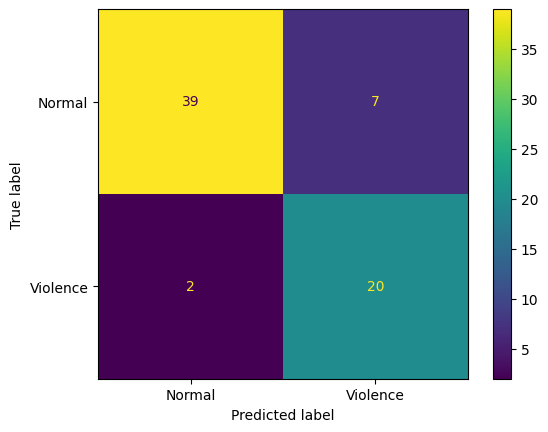

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(all_labels, all_preds)
ConfusionMatrixDisplay(cm, display_labels=["Normal", "Violence"]).plot()


# 단일 영상 테스트

In [ ]:
import cv2
import numpy as np
import mediapipe as mp
import torch
import torch.nn as nn
import torch.nn.functional as F
from google.colab import files
from ultralytics import YOLO

# 사용자로부터 영상 업로드
uploaded = files.upload()

# 파일이 업로드되었는지 확인
if not uploaded:
    print("파일 업로드가 취소되었거나 파일이 선택되지 않았습니다. 다시 시도해주세요.")
else:
    video_path = list(uploaded.keys())[0]
    print(f"업로드 완료: {video_path}")

    # 관절 연결 정의 (GCN_LSTM 모델에 필요)
    JOINT_CONNECTIONS = [
        (0, 1), (1, 2), (2, 3), (3, 7),
        (0, 4), (4, 5), (5, 6), (6, 8),
        (9, 10), (11, 12), (11, 13), (13, 15), (12, 14), (14, 16)
    ]

    def get_adjacency_matrix(num_joints=33):
        A = torch.eye(num_joints)
        for i, j in JOINT_CONNECTIONS:
            A[i, j] = 1
            A[j, i] = 1
        D_inv_sqrt = torch.diag(torch.pow(A.sum(1), -0.5))
        return D_inv_sqrt @ A @ D_inv_sqrt

    # GCN Layer (GCN_LSTM 모델에 필요)
    class GraphConv(nn.Module):
        def __init__(self, in_features, out_features, A):
            super().__init__()
            self.A = A
            self.fc = nn.Linear(in_features, out_features)

        def forward(self, x):
            Ax = torch.einsum('ij,bjc->bic', self.A, x)
            return F.relu(self.fc(Ax))

    # GCN-LSTM 모델 (훈련된 모델과 동일한 아키텍처)
    class GCN_LSTM(nn.Module):
        def __init__(self, num_joints=33, in_features=4, gcn_hidden=64, lstm_hidden=128):
            super().__init__()
            device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            self.A = get_adjacency_matrix(num_joints).to(torch.float32).to(device)
            self.gcn1 = GraphConv(in_features, gcn_hidden, self.A)
            self.gcn2 = GraphConv(gcn_hidden, gcn_hidden, self.A)
            self.lstm = nn.LSTM(
                gcn_hidden * num_joints, lstm_hidden,
                batch_first=True, bidirectional=True
            )
            self.fc = nn.Linear(lstm_hidden * 2, 1)

        def forward(self, x):  # (B, T, J, C)
            B, T, J, C = x.shape
            feats = []
            for t in range(T):
                xt = x[:, t, :, :]  # (B, J, C)
                h = self.gcn1(xt)
                h = self.gcn2(h)
                feats.append(h.view(B, -1))  # (B, J*C)
            x_seq = torch.stack(feats, dim=1)  # (B, T, J*C)

            _, (hn, _) = self.lstm(x_seq)  # hn: (2, B, H)
            hn_cat = torch.cat((hn[0], hn[1]), dim=1)  # (B, H*2)
            return self.fc(hn_cat).squeeze(1)  # logit

    # 전처리 함수 (어두운 프레임용 - 훈련 시와 동일)
    def enhance_brightness(frame):
        ycrcb = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)
        y, cr, cb = cv2.split(ycrcb)
        y = cv2.equalizeHist(y)  # 밝기 균일화
        merged = cv2.merge([y, cr, cb])
        frame_enhanced = cv2.cvtColor(merged, cv2.COLOR_YCrCb2BGR)

        # 대비·밝기 미세 조정
        frame_enhanced = cv2.convertScaleAbs(frame_enhanced, alpha=1.4, beta=20)
        return frame_enhanced

    # 스켈레톤 추출 함수 (32프레임 - 훈련 시와 동일하게 YOLO 및 밝기 보정 포함)
    def extract_skeleton_from_video(video_path, num_frames=32):
        cap = cv2.VideoCapture(video_path)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        if total_frames == 0:
            print(f"영상 손상 또는 프레임 없음: {video_path}")
            return np.zeros((num_frames, 33, 4), dtype=np.float32)

        frame_indices = np.linspace(0, total_frames - 1, num_frames, dtype=np.int32)
        sequence = []

        yolo = YOLO("yolov8n.pt") # YOLO 모델 로드 (훈련 시와 동일)
        mp_pose = mp.solutions.pose
        pose_detector = mp_pose.Pose(
            static_image_mode=False,
            model_complexity=2,                 # 정확도 높임
            enable_segmentation=False,
            min_detection_confidence=0.2,
            min_tracking_confidence=0.2
        )

        for idx in frame_indices:
            cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
            ret, frame = cap.read()
            if not ret or frame is None:
                sequence.append(np.zeros((33, 4)))
                continue

            # 어두운 장면 보정 (훈련 시와 동일)
            frame = enhance_brightness(frame)

            # YOLO 탐지 (훈련 시와 동일)
            results = yolo(frame, verbose=False)
            if len(results[0].boxes) == 0:
                sequence.append(np.zeros((33, 4)))  # 사람 없음
                continue

            # 가장 큰 사람 선택 (훈련 시와 동일)
            boxes = results[0].boxes.xyxy.cpu().numpy()
            areas = [(x2 - x1) * (y2 - y1) for x1, y1, x2, y2 in boxes]
            main_box = boxes[np.argmax(areas)]
            x1, y1, x2, y2 = map(int, main_box)

            # crop & 보정 (훈련 시와 동일)
            person_crop = frame[max(0, y1):y2, max(0, x1):x2]
            if person_crop.size == 0:
                sequence.append(np.zeros((33, 4)))
                continue

            # MediaPipe Pose 처리 (훈련 시와 동일)
            rgb = cv2.cvtColor(person_crop, cv2.COLOR_BGR2RGB)
            result = pose_detector.process(rgb)

            if result.pose_landmarks:
                landmarks = result.pose_landmarks.landmark
                coords = np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in landmarks], dtype=np.float32)
                # 정규화된 좌표를 [-1, 1]로 스케일링 (훈련 시와 동일)
                coords[:, 0] = (coords[:, 0] - 0.5) * 2
                coords[:, 1] = (coords[:, 1] - 0.5) * 2
            else:
                coords = np.zeros((33, 4), dtype=np.float32)

            sequence.append(coords)

        cap.release()
        pose_detector.close()
        return np.array(sequence, dtype=np.float32) # shape: (32, 33, 4)

    # 스켈레톤 추출
    skeleton = extract_skeleton_from_video(video_path)  # (32, 33, 4)
    tensor = torch.tensor(skeleton, dtype=torch.float32).unsqueeze(0) # 배치 차원 추가 (1, 32, 33, 4)

    # 모델 불러오기 & 추론
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = GCN_LSTM().to(device) # GCN_LSTM 모델 사용
    model.load_state_dict(torch.load("best_model_GCN-BILSTM.pth")) # 올바른 모델 파일명 사용
    model.eval()

    with torch.no_grad():
        logits = model(tensor.to(device))
        probs = torch.sigmoid(logits)
        prob = probs.item()
        label = 1 if prob > 0.5 else 0

    # 출력
    print(f"\n예측 결과: {'폭력' if label == 1 else '정상'}")
    print(f"예측 확률: {prob:.4f}")


Saving dancing.mp4 to dancing.mp4
업로드 완료: dancing.mp4

예측 결과: 정상
예측 확률: 0.0190
